In [1]:
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.medium import minimal_medium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import exp,log
from matplotlib_venn import venn3,venn2
from functions import *
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from cobra.flux_analysis import production_envelope

# 0. Load GSMMs

In [3]:
ref_lb = cobra.io.read_sbml_model('../data/GSMMs/Lactobacillus_delbrueckii_subsp_bulgaricus_ATCC_11842.xml')
ref_st = cobra.io.read_sbml_model('../data/GSMMs/Streptococcus_thermophilus_LMG_18311.xml')
st_ch8 = cobra.io.read_sbml_model('../data/GSMMs/ST_CH8.xml')

In [4]:
st = cobra.io.read_sbml_model('../data/GSMMs/st_raw.xml')
lb = cobra.io.read_sbml_model('../data/GSMMs/lb_raw.xml')
# st = cobra.io.read_sbml_model('../data/GSMMs/st.xml')
# lb = cobra.io.read_sbml_model('../data/GSMMs/lb.xml')

In [5]:
milkAA = pd.read_csv('../data/GSMMs/milkAA.csv')
# milk_desnity = 1.03 #g/ml
# milk_V = (100/1.03)/1000 #L
# concs = []
# for i in range(len(milkAA['aa'])):
#     temp_conc = (float(list(milkAA['concentration(g/100 g milk)'])[i])/aa_mass[ list(milkAA['aa'])[i] ])*1000/milk_V
#     concs.append(temp_conc)
# milkAA['conc(mmol/L)'] = concs
# milkAA.to_csv('../data/GSMMs/milkAA.csv',index=None)

In [6]:
milkAA_free = milkAA[milkAA['type']=='free'].reset_index().drop(['index'],axis=1)
milkAA_total = milkAA[milkAA['type']=='total'].reset_index().drop(['index'],axis=1)
aas = list(milkAA_free['aa'])
aa_mass = {aa:st.metabolites.get_by_id( aa+'_c' ).formula_weight for aa in aas}
print(aa_mass)

{'his__L': 155.15456, 'ile__L': 131.17291999999998, 'leu__L': 131.17291999999998, 'lys__L': 147.1955, 'met__L': 149.21134, 'phe__L': 165.18913999999998, 'thr__L': 119.11916, 'trp__L': 204.22518, 'val__L': 117.14634, 'ala__L': 89.09318, 'arg__L': 175.2089, 'asn__L': 132.11792, 'asp__L': 132.09474, 'cys__L': 121.15818, 'gln__L': 146.1445, 'glu__L': 146.12132, 'gly': 75.0666, 'pro__L': 115.13046, 'ser__L': 105.09258, 'tyr__L': 181.18854}


# 1. Add missing reactions

In [7]:
# lac__L_e = Metabolite('lac__L_e','C3H5O3','L-Lactate',-1,'C_e')
# diact_e = Metabolite('diact_e','C4H6O2','Diacetyl C4H6O2',0,'C_e')
# for_e = Metabolite('for_e','CHO2','Formate',-1,'C_e')
# ac_e = Metabolite('ac_e','C2H3O2','Acetate',-1,'C_e')
# pyr_e = Metabolite('pyr_e','C3H3O3','Pyruvate',-1,'C_e')
# ade_e = Metabolite('ade_e','C5H5N5','Adenine',0,'C_e')
# succ_e = Metabolite('succ_e','C4H4O4','Succinate',-2,'C_e')
# _4hba_e = Metabolite('4hba_e','C7H8O2','4-Hydroxy-benzyl alcohol',0,'C_e')
# _3mob_e = Metabolite('3mob_e','C5H7O3','3-Methyl-2-oxobutanoate',0,'C_e')
# _3mop_e = Metabolite('3mop_e','C6H9O3','(S)-3-Methyl-2-oxopentanoate',0,'C_e')
# _4mop_e = Metabolite('4mop_e','C6H9O3','4-Methyl-2-oxopentanoate',0,'C_e')

# EX_ade_e = Reaction('EX_ade_e','Adenine exchange','',-1000.0,1000.0)
# ADEt2 = Reaction('ADEt2','Adenine transport in via proton symport','',-1000,1000.0)

# EX_pyr_e = Reaction('EX_pyr_e','Pyruvate exchange','',-1000.0,1000.0)
# PYRt2 = Reaction('PYRt2','Pyruvate transport in via proton symport','',-1000.0,1000.0)
# EX_for_e = Reaction('EX_for_e','Formate exchange','',-1000.0,1000.0)
# FORt2 = Reaction('FORt2','Formate transport in via proton symport','',-1000.0,1000.0)
# EX_ac_e = Reaction('EX_ac_e','Acetate exchange','',-1000.0,1000.0)
# ACt2r = Reaction('ACt2r','Acetate reversible transport via proton symport','',-1000.0,1000.0)

# DIACTt = Reaction('DIACTt','Diacetyl diffusion','',-1000.0,1000.0)
# L_LACt2r = Reaction('L_LACt2r','L lactate reversible transport via proton symport','',-1000.0,1000.0)
# EX_diact_e = Reaction('EX_diact_e','Diacetyl exchange','',-1000.0,1000.0)
# EX_lac__L_e = Reaction('EX_lac__L_e','L-Lactate exchange','',-1000.0,1000.0)

# PDH = Reaction('PDH','Pyruvate dehydrogenase','',0.0,1000.0)

# GALKr = Reaction('GALKr','Galactokinase','',0.0,1000.0)
# GALKr.gene_reaction_rule='s1_NODE_7_length_66682_cov_834_608543_35'

# CITt2r = Reaction('CITt2r','Citrate reversible transport via symport','',-1000.0,1000.0)

# SUCCt = Reaction('SUCCt','Succinate transport via diffusion','',-1000.0,1000.0)
# EX_succ_e = Reaction('EX_succ_e','R_EX_succ_e','',-1000.0,1000.0)
# _4HBAt = Reaction('4HBAt','MNXR68734','',-1000.0,1000.0)
# EX_4hba_e = Reaction('EX_4hba_e','R_EX_4hba_e','',-1000.0,1000.0)

# GALT = Reaction('GALT','Galactose 1 phosphate uridylyltransferase','',-1000.0,1000.0)
# ACTNdiff = Reaction('ACTNdiff','R acetoin diffusion','',-1000.0,1000.0)

# EX_3mob_e = Reaction('EX_3mob_e','R_EX_3mob_e','',-1000.0,1000.0)
# EX_3mop_e = Reaction('EX_3mop_e','R_EX_3mop_e','',-1000.0,1000.0)
# EX_4mop_e = Reaction('EX_4mop_e','R_EX_4mop_e','',-1000.0,1000.0)
# _3MOBte  = Reaction('3MOBte','Transport of 3-methyl-2-oxobutanoate','',-1000.0,1000.0)
# _3MOPte  = Reaction('3MOPte','Transport of (S)-3-Methyl-2-oxopentanoate','',-1000.0,1000.0)
# _4MOPte  = Reaction('4MOPte','Transport of 4-Methyl-2-oxopentanoate','',-1000.0,1000.0)

In [8]:
# lb.add_metabolites([ for_e,lac__L_e,ac_e,succ_e,_4hba_e, _3mob_e,_3mop_e,_4mop_e])
# st.add_metabolites([ pyr_e,lac__L_e,diact_e,ade_e,ac_e, _3mob_e,_3mop_e,_4mop_e ])
# lb.add_reactions([ EX_for_e, FORt2,L_LACt2r,EX_lac__L_e,EX_ac_e,ACt2r, ADEt2,PDH, CITt2r,
#                  SUCCt,EX_succ_e,_4HBAt,EX_4hba_e, GALT, ACTNdiff,EX_3mob_e,EX_3mop_e,EX_4mop_e,
#                  _3MOBte,_3MOPte,_4MOPte])
# st.add_reactions([ EX_pyr_e,PYRt2, L_LACt2r,EX_lac__L_e,DIACTt,EX_diact_e,EX_ade_e, ADEt2,
#         EX_ac_e,ACt2r,GALKr, CITt2r, ACTNdiff,EX_3mob_e,EX_3mop_e,EX_4mop_e,_3MOBte,_3MOPte,_4MOPte])


# lb.reactions.EX_for_e.build_reaction_from_string('for_e <=>')
# lb.reactions.FORt2.build_reaction_from_string('for_e + h_e <=> for_c + h_c')
# lb.reactions.L_LACt2r.build_reaction_from_string('h_e + lac__L_e <=> h_c + lac__L_c')
# lb.reactions.EX_lac__L_e.build_reaction_from_string('lac__L_e <=>')
# lb.reactions.EX_ac_e.build_reaction_from_string('ac_e <=>')
# lb.reactions.ACt2r.build_reaction_from_string('ac_e + h_e <=> ac_c + h_c')
# lb.reactions.ADEt2.build_reaction_from_string('ade_e + h_e <=> ade_c + h_c')
# lb.reactions.PDH.build_reaction_from_string('coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c')
# lb.reactions.CITt2r.build_reaction_from_string( 'cit_e + h_e <=> cit_c + h_c' )
# lb.reactions.SUCCt.build_reaction_from_string('succ_e <=> succ_c')
# lb.reactions.EX_succ_e.build_reaction_from_string('succ_e <=> ')
# lb.reactions.get_by_id('4HBAt').build_reaction_from_string('4hba_e <=> 4hba_c')
# lb.reactions.EX_4hba_e.build_reaction_from_string('4hba_e <=> ')
# lb.reactions.GALT.build_reaction_from_string('gal1p_c + h_c + utp_c <=> ppi_c + udpgal_c')
# lb.reactions.ACTNdiff.build_reaction_from_string('actn__R_e <=> actn__R_c')
# lb.reactions.EX_3mob_e.build_reaction_from_string('3mob_e <=>')
# lb.reactions.EX_3mop_e.build_reaction_from_string('3mop_e <=>')
# lb.reactions.EX_4mop_e.build_reaction_from_string('4mop_e <=>')
# lb.reactions.get_by_id('3MOBte').build_reaction_from_string('3mob_c <=> 3mob_e')
# lb.reactions.get_by_id('3MOPte').build_reaction_from_string('3mop_c <=> 3mop_e')
# lb.reactions.get_by_id('4MOPte').build_reaction_from_string('4mop_c <=> 4mop_e')

# st.reactions.EX_pyr_e.build_reaction_from_string('pyr_e <=>')
# st.reactions.PYRt2.build_reaction_from_string('h_e + pyr_e <=> h_c + pyr_c')
# st.reactions.L_LACt2r.build_reaction_from_string('h_e + lac__L_e <=> h_c + lac__L_c')
# st.reactions.EX_lac__L_e.build_reaction_from_string('lac__L_e <=>')
# st.reactions.EX_diact_e.build_reaction_from_string('diact_e <=>')
# st.reactions.DIACTt.build_reaction_from_string('diact_c <=> diact_e')
# st.reactions.EX_ade_e.build_reaction_from_string('ade_e <=>')
# st.reactions.ADEt2.build_reaction_from_string('ade_e + h_e <=> ade_c + h_c')
# st.reactions.EX_ac_e.build_reaction_from_string('ac_e <=>')
# st.reactions.ACt2r.build_reaction_from_string('ac_e + h_e <=> ac_c + h_c')
# st.reactions.GALKr.build_reaction_from_string('atp_c + gal_c <=> adp_c + gal1p_c + h_c')
# st.reactions.CITt2r.build_reaction_from_string( 'cit_e + h_e <=> cit_c + h_c' )
# st.reactions.ACTNdiff.build_reaction_from_string('actn__R_e <=> actn__R_c')
# st.reactions.EX_3mob_e.build_reaction_from_string('3mob_e <=>')
# st.reactions.EX_3mop_e.build_reaction_from_string('3mop_e <=>')
# st.reactions.EX_4mop_e.build_reaction_from_string('4mop_e <=>')
# st.reactions.get_by_id('3MOBte').build_reaction_from_string('3mob_c <=> 3mob_e')
# st.reactions.get_by_id('3MOPte').build_reaction_from_string('3mop_c <=> 3mop_e')
# st.reactions.get_by_id('4MOPte').build_reaction_from_string('4mop_c <=> 4mop_e')

# 2. Complete pentose phosphate pathway for st and lb
* add TKT1/2,TALA to lb
* add GND,PGL,G6PDH2r to st

In [9]:
# _6pgc_c = Metabolite('6pgc_c','C6H10O10P','6-Phospho-D-gluconate',-3,'C_c')#st
# _6pgl_c = Metabolite('6pgl_c','C6H9O9P','6-phospho-D-glucono-1,5-lactone',-2,'C_c')#st
# s7p_c = Metabolite('s7p_c','C7H13O10P','Sedoheptulose 7-phosphate',-2,'C_c')


# TKT1 = Reaction('TKT1','Transketolase','',-1000.0,1000.0)
# TKT2 = Reaction('TKT2','Transketolase','',-1000.0,1000.0)
# TALA = Reaction('TALA','Transaldolase','',-1000.0,1000.0)
# GND = Reaction('GND','Phosphogluconate dehydrogenase','',0.0,1000.0)
# PGL = Reaction('PGL','6-phosphogluconolactonase','',0.0,1000.0)
# G6PDH2r = Reaction('G6PDH2r','Glucose 6-phosphate dehydrogenase','',-1000.0,1000.0)
# st.add_metabolites([_6pgc_c,_6pgl_c])
# lb.add_metabolites([s7p_c])
# st.add_reactions([GND,PGL,G6PDH2r])
# lb.add_reactions([TKT1,TKT2,TALA])

# lb.reactions.TKT1.build_reaction_from_string('r5p_c + xu5p__D_c <=> g3p_c + s7p_c')
# lb.reactions.TKT2.build_reaction_from_string('e4p_c + xu5p__D_c <=> f6p_c + g3p_c')
# lb.reactions.TALA.build_reaction_from_string('g3p_c + s7p_c <=> e4p_c + f6p_c')
# st.reactions.GND.build_reaction_from_string('6pgc_c + nadp_c --> co2_c + nadph_c + ru5p__D_c')
# st.reactions.PGL.build_reaction_from_string('6pgl_c + h2o_c --> 6pgc_c + h_c')
# st.reactions.G6PDH2r.build_reaction_from_string('g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c')

# 3. Add amino acid exportation via proton symport

In [10]:
# for aa in aa_mass.keys():
#     aa_name  = aa.split('__L')[0]
#     rxn_id = aa_name.upper() + 'c2e'
#     st.add_reactions([Reaction(rxn_id,'','',0.0,1000.0)])
#     lb.add_reactions([Reaction(rxn_id,'','',0.0,1000.0)])
#     rxn_eqn = 'h_c + '+ (aa+'_c') + ' --> h_e + ' + (aa+'_e')
#     lb.reactions.get_by_id(rxn_id).build_reaction_from_string(rxn_eqn)
#     st.reactions.get_by_id(rxn_id).build_reaction_from_string(rxn_eqn)

# 4. Add EM (endogenous metabolism) and set objective as Growth - EM

In [11]:
# for rxn in (st.reactions.query('TECA') + st.reactions.query('_BS')):
#     if not rxn.reversibility:
#         rxn.lower_bound = -1000.0
#         rxn.upper_bound = 1000.0
        
# for rxn in (lb.reactions.query('TECA') + lb.reactions.query('_BS')):
#     if not rxn.reversibility:
#         rxn.lower_bound = -1000.0
#         rxn.upper_bound = 1000.0

# st_growth_r, st_growth_p = st.reactions.Growth.reaction.split('-->')
# lb_growth_r, lb_growth_p = lb.reactions.Growth.reaction.split('-->')
# EM_st, EM_lb = Reaction('EM','Endogenous metabolism','',0.0,1000.0), Reaction('EM','Endogenous metabolism','',0.0,1000.0)
# st.add_reactions([ EM_st ])
# lb.add_reactions([ EM_lb ])
# st.reactions.EM.build_reaction_from_string( st_growth_p.strip() + ' --> '+ st_growth_r.strip() )
# lb.reactions.EM.build_reaction_from_string( lb_growth_p.strip() + ' --> '+ lb_growth_r.strip() )
# st.objective = st.problem.Objective( st.reactions.Growth.flux_expression - st.reactions.EM.flux_expression,
#                                    direction='max')
# lb.objective = lb.problem.Objective( lb.reactions.Growth.flux_expression - lb.reactions.EM.flux_expression,
#                                    direction='max')

# 5. Remove metabolites and reactions

In [12]:
# st.remove_metabolites( st.metabolites.query('__L_p'), destructive=True)
# st.remove_metabolites(st.metabolites.get_by_id('orn__L_c'),destructive=True)
# st.remove_metabolites(st.metabolites.get_by_id('orn_p'), destructive=True )
# st.remove_metabolites(st.metabolites.get_by_id('a_gal__D_c'), destructive=True)
# st.remove_metabolites([st.metabolites.glc__aD_c,st.metabolites.glc__aD_e,st.metabolites.glc__bD_c], destructive=True)

In [13]:
# lb.remove_metabolites( [met_p for met_p in lb.metabolites.query('__L_p') if met_p.id not in ['arab__L_p','hom__L_p']],
#                      destructive=True)
# lb.remove_metabolites(lb.metabolites.get_by_id('gly_p'), destructive=True)
# lb.remove_metabolites([lb.metabolites.get_by_id('orn__L_c'),lb.metabolites.get_by_id('orn__L_e')],destructive=True)
# lb.remove_metabolites(lb.metabolites.get_by_id('orn_p'), destructive=True )
# lb.remove_metabolites( lb.metabolites.get_by_id('ade_p'), destructive=True  )
# lb.remove_reactions([lb.reactions.PKETX, lb.reactions.PKETF])
# lb.remove_reactions([lb.reactions.GAPD_1])
# lb.remove_reactions([lb.reactions.ARGORNt7, lb.reactions.GLUABUTt7, lb.reactions.PTRCORNt7 ])
# lb.remove_metabolites(lb.metabolites.get_by_id('g3ps_e'),destructive=True)
# lb.remove_metabolites([ lb.metabolites.glc__aD_c,lb.metabolites.glc__aD_e ], destructive=True)
# lb.remove_metabolites([lb.metabolites.g6p_B_c,lb.metabolites.g6p_A_c ], destructive=True)
# lb.remove_reactions([lb.reactions.GAL6PI])
# lb.remove_reactions([lb.reactions.UGLT])
# lb.remove_reactions([lb.reactions.LCTSabc])

In [14]:
# #homefermentation assumption
# lb.remove_metabolites( lb.metabolites.get_by_id('lac__D_c'),destructive=True )
# st.remove_metabolites( st.metabolites.get_by_id('lac__D_c'),destructive=True )

In [15]:
# #No gene reaction rule
# st.remove_reactions(['METS'])

# 6. Add casein proteolysis

In [16]:
# casein_elements = {'C':0,'H':0,'N':0,'O':0,'S':0}
# temp_coeff = [ np.round(v/13, 2)  for v in list(milkAA_total['conc(mmol/L)'])]
# milkAA_total['temp_coeff'] = temp_coeff
# casein_charge = 0
# for i in range(len(milkAA_total['aa'])):
#     aa_elements = lb.metabolites.get_by_id(list(milkAA_total['aa'])[i]+'_c').elements
#     for k in aa_elements.keys():
#         casein_elements[k] = casein_elements[k] + aa_elements[k]*list(milkAA_total['temp_coeff'])[i]
#     casein_charge += lb.metabolites.get_by_id(list(milkAA_total['aa'])[i]+'_c').charge * list(milkAA_total['temp_coeff'])[i]
# formula=''
# for k in casein_elements.keys():
#     casein_elements[k] = int(np.round(casein_elements[k],1))
#     formula += k+str(casein_elements[k])

    
# print(casein_charge)
# print(formula)

-2.8200000000000003
C141H270N35O73S1


In [17]:
# # assume length of oligopeptide is ~ 30
# caspep_e = Metabolite('caspep_e','C141H270N35O73S1','Casein peptide',-3,'C_e')
# caspep_c = Metabolite('caspep_c','C141H270N35O73S1','Casein peptide',-3,'C_c')

# EX_caspep_e = Reaction('EX_caspep_e','Casein peptide exchange','',-1000.0,1000.0)
# EX_caspep_e_rxn = 'caspep_e <=>'
# CASPEPt2r = Reaction('CASPEPt2r','Casein peptide uptake','',0.0,1000.0)
# CASPEPt2r_rxn = 'caspep_e --> caspep_c'

# PROLYSIS = Reaction('PROLYSIS','Casein proteolysis','',0,1000.0)
# PROLYSIS_rxn = 'caspep_c --> '
# for i in range(len(milkAA_total['aa'])):
#     PROLYSIS_rxn = PROLYSIS_rxn + str(list(milkAA_total['temp_coeff'])[i]) + ' ' \
#     + list(milkAA_total['aa'])[i]+'_c + '
# PROLYSIS_rxn = PROLYSIS_rxn[:-3]


# print( caspep_e.formula_weight )
# print(EX_caspep_e_rxn)
# print(CASPEPt2r_rxn)
# print(PROLYSIS_rxn)

3655.9082000000003
caspep_e <=>
caspep_e --> caspep_c
caspep_c --> 0.87 his__L_c + 1.15 ile__L_c + 2.48 leu__L_c + 1.99 lys__L_c + 0.74 met__L_c + 1.06 phe__L_c + 1.53 thr__L_c + 0.19 trp__L_c + 1.56 val__L_c + 1.42 ala__L_c + 0.72 arg__L_c + 2.1 asn__L_c + 0.26 cys__L_c + 5.53 glu__L_c + 0.84 gly_c + 2.13 pro__L_c + 2.11 ser__L_c + 1.01 tyr__L_c


In [18]:
# lb.add_metabolites([ caspep_e, caspep_c ])
# lb.add_reactions([ EX_caspep_e, CASPEPt2r, PROLYSIS ])
# lb.reactions.EX_caspep_e.build_reaction_from_string(  EX_caspep_e_rxn )
# lb.reactions.CASPEPt2r.build_reaction_from_string( CASPEPt2r_rxn )
# lb.reactions.PROLYSIS.build_reaction_from_string( PROLYSIS_rxn )

# st.add_metabolites([ caspep_e, caspep_c ])
# st.add_reactions([ EX_caspep_e, CASPEPt2r, PROLYSIS ])
# st.reactions.EX_caspep_e.build_reaction_from_string(  EX_caspep_e_rxn )
# st.reactions.CASPEPt2r.build_reaction_from_string( CASPEPt2r_rxn )
# st.reactions.PROLYSIS.build_reaction_from_string( PROLYSIS_rxn )

# 7. Fix direction of glycolytic reactions
* fix for GAPD, PGK, PGM,ENO, LDH_L, PTAr, ACKr

In [19]:
# fix_list = ['GAPD', 'PGK', 'PGM','ENO', 'LDH_L', 'PTAr', 'ACKr']
# dirs = [1,-1,-1,1,-1,1,-1]
# fix_dir_dict = {fix_list[i]:dirs[i] for i in range(len(dirs))}
# for model in [st,lb]:
#     for rxn_id in fix_dir_dict.keys():
#         if fix_dir_dict[rxn_id] == 1:
#             model.reactions.get_by_id(rxn_id).lower_bound = 0.0
#         else:
#             model.reactions.get_by_id(rxn_id).upper_bound = 0.0

In [20]:
# lb.id = 'lb'
# st.id = 'st'
# cobra.io.write_sbml_model(lb,'../data/GSMMs/lb.xml' )
# cobra.io.write_sbml_model(st,'../data/GSMMs/st.xml' )

In [21]:
# cobra.io.save_json_model( lb , "../../Figures/lb.json")
# cobra.io.save_json_model( st , "../../Figures/st.json")

# 8. Adjust biomass:
### a. LB from AGORA https://www.nature.com/articles/nbt.3703
### b. ST from https://doi.org/10.1128/AEM.00138-09

In [9]:
aa_names = {'A':'ala__L_c', 'C':'cys__L_c', 'D':'asp__L_c', 'E':'glu__L_c', 'F':'phe__L_c', 'G':'gly_c',
            'H':'his__L_c', 'I':'ile__L_c', 'K':'lys__L_c', 'L':'leu__L_c', 'M':'met__L_c', 'N':'asn__L_c',
            'P':'pro__L_c','Q':'gln__L_c', 'R':'arg__L_c', 'S':'ser__L_c', 'T':'thr__L_c', 'V':'val__L_c',
            'W':'trp__L_c', 'Y':'tyr__L_c'}
nu_names = {'A':'datp_c','T':'dttp_c','C':'dctp_c','G':'dgtp_c'}
rev_aa_names = {aa_names[x]:x for x in aa_names.keys() }

In [10]:
st_biomass = {'proteins':0.46,'lipids':0.034,'PS':0.12,'DNA':0.023,'RNA':0.107,'other':0.256}
lb_biomass = {'proteins':0,'DNA':0,'RNA':0,'other':0}
aa_ids = [ ID.replace('__L','_L').replace('_c','[c]') for ID in list(aa_names.values())]
for aa_id in aa_ids:
    lb_biomass['proteins'] += abs(ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id(aa_id)])*\
                ref_lb.metabolites.get_by_id(aa_id).formula_weight/1000
dna_ids = ['datp[c]','dttp[c]','dctp[c]','dgtp[c]']
rna_ids = ['atp[c]','utp[c]','ctp[c]','gtp[c]']
for dna_id in dna_ids:
    lb_biomass['DNA'] += abs(ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id(dna_id)])*\
                ref_lb.metabolites.get_by_id(dna_id).formula_weight/1000
for rna_id in rna_ids:
    if rna_id == 'atp[c]':
        rna_id = 'utp[c]'
    lb_biomass['RNA'] += abs(ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id(rna_id)])*\
                ref_lb.metabolites.get_by_id(rna_id).formula_weight/1000
lb_biomass['other'] = 1 - (lb_biomass['proteins']+lb_biomass['DNA']+lb_biomass['RNA'])

In [ ]:
# st_aas,lb_aas = {aa:0 for aa in aa_names.keys() },{aa:0 for aa in aa_names.keys() }
# stnr_records = SeqIO.parse( '../data/MAGs/st_all/st_nr.faa', "fasta")
# lbnr_records = SeqIO.parse( '../data/MAGs/lb_all/lb_nr.faa', "fasta")
# for r in stnr_records:
#     for aa in aa_names.keys():
#         st_aas[aa] = str(r.seq).count(aa) + st_aas[aa]
# for r in lbnr_records:
#     for aa in aa_names.keys():
#         lb_aas[aa] = str(r.seq).count(aa) + lb_aas[aa]
# sum_st, sum_lb = sum(st_aas.values()), sum(lb_aas.values())
# for aa in aa_names.keys():
#     st_aas[aa] = st_aas[aa]/sum_st
#     lb_aas[aa] = lb_aas[aa]/sum_lb

In [11]:
st_aas,lb_aas = {aa_id: abs(ref_st.reactions.biomass525.metabolites[ref_st.metabolites.get_by_id(aa_id)]) \
        for aa_id in aa_ids }, {aa_id: abs(ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id(aa_id)]) \
                                for aa_id in aa_ids }
sum_st, sum_lb = sum(st_aas.values()), sum(lb_aas.values())
st_aa_freq, lb_aa_freq = {},{}
for aa_id in st_aas.keys():
    st_aa_freq[aa_id.replace('_L','__L').replace('[c]','_c')] = st_aas[aa_id]/sum_st
    lb_aa_freq[aa_id.replace('_L','__L').replace('[c]','_c')] = lb_aas[aa_id]/sum_lb

st_rnas,lb_rnas = {rna_id: abs(ref_st.reactions.biomass525.metabolites[ref_st.metabolites.get_by_id(rna_id)]) \
    for rna_id in rna_ids}, {rna_id: abs(ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id(rna_id)]) \
                                for rna_id in rna_ids }
st_rnas['atp[c]'] = abs(ref_st.reactions.biomass525.metabolites[ref_st.metabolites.get_by_id('atp[c]')]) - \
           ref_st.reactions.biomass525.metabolites[ref_st.metabolites.get_by_id('adp[c]')] 
lb_rnas['atp[c]'] = abs( ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id('atp[c]')]) - \
           ref_lb.reactions.biomass205.metabolites[ref_lb.metabolites.get_by_id('adp[c]')]                                               
sum_st, sum_lb = sum(st_rnas.values()), sum(lb_rnas.values())
st_rna_freq, lb_rna_freq = {},{}
for rna_id in st_rnas.keys():
    st_rna_freq[rna_id.replace('[c]','_c')] = st_rnas[rna_id]/sum_st
    lb_rna_freq[rna_id.replace('[c]','_c')] = lb_rnas[rna_id]/sum_lb

In [12]:
st_nus,lb_nus = {'A':0,'T':0,'G':0,'C':0},{'A':0,'T':0,'G':0,'C':0}
g_files = {'ST':['../../meta_raw/s1/reassembled_bins/bin.2.strict.fa','../../meta_raw/s2/reassembled_bins/bin.1.strict.fa',
                '../../meta_raw/s3/reassembled_bins/bin.1.orig.fa'],
           'LB':['../../meta_raw/s1/reassembled_bins/bin.1.strict.fa','../../meta_raw/s2/reassembled_bins/bin.2.strict.fa',
                '../../meta_raw/s3/reassembled_bins/bin.2.strict.fa']}
for g_file in g_files['ST']:
    genome = SeqIO.parse( g_file, "fasta")
    for r in genome:
        for nu in st_nus.keys():
            st_nus[nu] = st_nus[nu] + str(r.seq).count(nu)
for g_file in g_files['LB']:
    genome = SeqIO.parse( g_file, "fasta")
    for r in genome:
        for nu in lb_nus.keys():
            lb_nus[nu] = lb_nus[nu] + str(r.seq).count(nu)
sum_st, sum_lb = sum( st_nus.values()), sum( lb_nus.values())
for nu in lb_nus.keys():
    st_nus[nu] = st_nus[nu]/sum_st
    lb_nus[nu] = lb_nus[nu]/sum_lb

In [13]:
print('ST biomass:')
print(st_biomass)
print('LB biomass:')
print(lb_biomass)

ST biomass:
{'proteins': 0.46, 'lipids': 0.034, 'PS': 0.12, 'DNA': 0.023, 'RNA': 0.107, 'other': 0.256}
LB biomass:
{'proteins': 0.52914938001568, 'DNA': 0.025954382362103998, 'RNA': 0.061632282124351005, 'other': 0.38326395549786496}


Text(0, 0.5, 'mol/mol(%)')

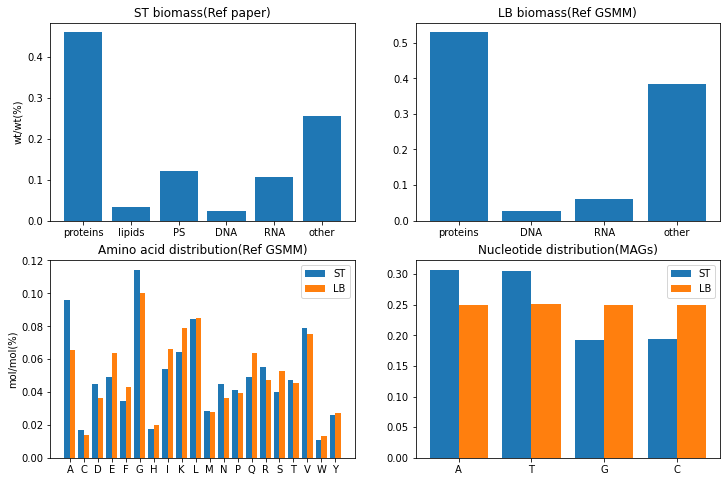

In [14]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
axs[0][0].bar(st_biomass.keys(),st_biomass.values())
axs[0][0].set_title('ST biomass(Ref paper)')
axs[0][1].bar(lb_biomass.keys(),lb_biomass.values())
axs[0][1].set_title('LB biomass(Ref GSMM)')
X_axis = np.arange(len(st_aa_freq.keys()))
axs[1][0].bar(X_axis - 0.2, st_aa_freq.values(), 0.4, label = 'ST')
axs[1][0].bar(X_axis + 0.2, lb_aa_freq.values(), 0.4, label = 'LB')
axs[1][0].set_xticks(X_axis, [ rev_aa_names[x] for x in list(st_aa_freq.keys())] );
axs[1][0].set_title('Amino acid distribution(Ref GSMM)')
axs[1][0].legend()
X_axis = np.arange(len(st_nus.keys()))
axs[1][1].bar(X_axis - 0.2, st_nus.values(), 0.4, label = 'ST')
axs[1][1].bar(X_axis + 0.2, lb_nus.values(), 0.4, label = 'LB')
axs[1][1].set_xticks(X_axis, list(st_nus.keys()) );
axs[1][1].set_title('Nucleotide distribution(MAGs)')
axs[1][1].legend()
axs[0][0].set_ylabel('wt/wt(%)')
axs[1][0].set_ylabel('mol/mol(%)')

###  Biomass in ST

In [15]:
# unit: mmol/gDW
st_biomass_dict = { met.id:st.reactions.Growth.metabolites[met]  for met in st.reactions.Growth.reactants }
lb_biomass_dict = { met.id:lb.reactions.Growth.metabolites[met]  for met in lb.reactions.Growth.reactants }

st_GAM,lb_GAM = 18.15, 27.4 #REF:st_ch8, https://doi.org/10.1074/jbc.M606263200
st_cp = 1000*st_biomass['proteins']/sum([st_aa_freq[aa]*st.metabolites.get_by_id(aa).\
                                    formula_weight for aa in st_aa_freq.keys()  ])
st_caas = {aa:st_cp*st_aa_freq[aa] for aa in st_aa_freq.keys()}
st_cdna = 1000*st_biomass['DNA']/sum( [st_nus[nu]*st.metabolites.get_by_id(nu_names[nu]).formula_weight \
                                    for nu in st_nus.keys()] )
st_cdnu = { nu_names[nu]:st_cdna*st_nus[nu] for nu in st_nus.keys() }
st_crna = 1000*st_biomass['RNA']/sum( [st_rna_freq[rna_id]*st.metabolites.get_by_id(rna_id).formula_weight \
                    for rna_id in st_rna_freq.keys()] )
st_cnu = { rna_id: st_crna * st_rna_freq[rna_id] for rna_id in st_rna_freq.keys() }

st_sum_ppi = sum(st_cdnu.values()) + sum(st_cnu.values())


other_ids = []
for k in st_biomass_dict.keys():
    if k not in (list(st_caas.keys())+list(st_cdnu.keys())+list(st_cnu.keys()) ) and k != 'h2o_c':
        other_ids.append(k)
        

st_cotrs = (1-(st_biomass['proteins']+st_biomass['DNA']+st_biomass['RNA']))/sum([ abs(st_biomass_dict[otr_id])/1000*\
     st.metabolites.get_by_id(otr_id).formula_weight for otr_id in other_ids ])
st_cothers = { otr_id: st_cotrs * abs(st_biomass_dict[otr_id]) for otr_id in other_ids }

st_growth = ''
for aa_id in st_caas.keys():
    st_growth += str(st_caas[aa_id])+' '+aa_id+' + '
for dnu in st_cdnu:
    st_growth += str(st_cdnu[dnu]) + ' ' + dnu + ' + '
for nu in st_cnu:
    if nu == 'atp_c':
        st_growth += str(st_cnu[nu]+st_GAM) + ' ' + nu + ' + '
    else:
        st_growth += str(st_cnu[nu]) + ' ' + nu + ' + '
for otr_id in st_cothers:
    st_growth += str(st_cothers[otr_id]) + ' ' + otr_id + ' + '
st_growth += str(st_GAM - 5) + ' h2o_c'
st_growth += ' --> '+ str(st_GAM) + ' adp_c + ' + str(st_GAM) + ' pi_c + ' + str(st_GAM) + ' h_c + '\
                    + str(st_sum_ppi) + ' ppi_c '

st_EM = st_growth.split('-->')[1].strip() + ' --> ' + st_growth.split('-->')[0]

In [16]:
print(st_growth)

0.34979774305461864 ala__L_c + 0.06224253724953 cys__L_c + 0.16416136931579794 asp__L_c + 0.1790819505647581 glu__L_c + 0.12630380451534207 phe__L_c + 0.4167689783464821 gly_c + 0.06479085780695906 his__L_c + 0.19764698696172964 ile__L_c + 0.23332207574264704 lys__L_c + 0.30684773420857303 leu__L_c + 0.10446505408906283 met__L_c + 0.16416136931579794 asn__L_c + 0.15069577207986345 pro__L_c + 0.1790819505647581 gln__L_c + 0.20164819299755019 arg__L_c + 0.14668757092859566 ser__L_c + 0.17253452250614268 thr__L_c + 0.2879189518083451 val__L_c + 0.038582958272334524 trp__L_c + 0.09390942487917964 tyr__L_c + 0.01465323901792241 datp_c + 0.01455613305902448 dttp_c + 0.009162155225282317 dgtp_c + 0.009267314228779635 dctp_c + 18.20622475056611 atp_c + 0.04636476050504721 utp_c + 0.04293045622296665 ctp_c + 0.06911578685111122 gtp_c + 0.00045382122020213737 10fthf_c + 0.00045382122020213737 amet_c + 0.010592553592610427 ca2_c + 0.010592553592610427 cl_c + 0.001172201896127494 coa_c + 0.0002035

###  Biomass in LB

In [17]:
# add ptrc_c to LB biomass, 0.0079397 mmol/gDW

lb_cp = 1000*lb_biomass['proteins']/sum([lb_aa_freq[aa]*lb.metabolites.get_by_id(aa).\
                                    formula_weight for aa in lb_aa_freq.keys()  ])
lb_caas = {aa:lb_cp*lb_aa_freq[aa] for aa in lb_aa_freq.keys()}
lb_cdna = 1000*lb_biomass['DNA']/sum( [lb_nus[nu]*lb.metabolites.get_by_id(nu_names[nu]).formula_weight \
                                    for nu in lb_nus.keys()] )
lb_cdnu = { nu_names[nu]:lb_cdna*lb_nus[nu] for nu in lb_nus.keys() }
lb_crna = 1000*lb_biomass['RNA']/sum( [lb_rna_freq[rna_id]*lb.metabolites.get_by_id(rna_id).formula_weight \
                    for rna_id in lb_rna_freq.keys()] )
lb_cnu = { rna_id: lb_crna * lb_rna_freq[rna_id] for rna_id in lb_rna_freq.keys() }

lb_sum_ppi = sum(lb_cdnu.values()) + sum(lb_cnu.values())

other_ids = []
for k in lb_biomass_dict.keys():
    if k not in (list(lb_caas.keys())+list(lb_cdnu.keys())+list(lb_cnu.keys()) ) and k != 'h2o_c':
        other_ids.append(k)

lb_cotrs = lb_biomass['other']/sum([ abs(lb_biomass_dict[otr_id])/1000*\
     lb.metabolites.get_by_id(otr_id).formula_weight for otr_id in other_ids ])
lb_cothers = { otr_id: lb_cotrs * abs(lb_biomass_dict[otr_id]) for otr_id in other_ids }

lb_growth = ''
for aa_id in lb_caas.keys():
    lb_growth += str(lb_caas[aa_id])+' '+aa_id+' + '
for dnu in lb_cdnu:
    lb_growth += str(lb_cdnu[dnu]) + ' ' + dnu + ' + '
for nu in lb_cnu:
    if nu == 'atp_c':
        lb_growth += str(lb_cnu[nu]+lb_GAM) + ' ' + nu + ' + '
    else:
        lb_growth += str(lb_cnu[nu]) + ' ' + nu + ' + '
for otr_id in lb_cothers:
    lb_growth += str(lb_cothers[otr_id]) + ' ' + otr_id + ' + '
lb_growth += str(lb_GAM - 5) + ' h2o_c + 0.0079397 ptrc_c'
lb_growth += ' --> '+ str(lb_GAM) + ' adp_c + ' + str(lb_GAM) + ' pi_c + ' + str(lb_GAM) + ' h_c + '\
                    + str(lb_sum_ppi) + ' ppi_c '

lb_EM = lb_growth.split('-->')[1].strip() + ' --> ' + lb_growth.split('-->')[0]

In [18]:
print(lb_EM)

27.4 adp_c + 27.4 pi_c + 27.4 h_c + 0.1773654687222399 ppi_c --> 0.26756 ala__L_c + 0.056954 cys__L_c + 0.14833 asp__L_c + 0.26101 glu__L_c + 0.17619 phe__L_c + 0.40933 gly_c + 0.081948 his__L_c + 0.27043 ile__L_c + 0.3237 lys__L_c + 0.34746 leu__L_c + 0.1135 met__L_c + 0.14833 asn__L_c + 0.16103 pro__L_c + 0.26101 gln__L_c + 0.1934 arg__L_c + 0.21675 ser__L_c + 0.18684 thr__L_c + 0.30772 val__L_c + 0.054496 trp__L_c + 0.11104 tyr__L_c + 0.013399066183070189 datp_c + 0.0134754593212057 dttp_c + 0.013429197465926426 dgtp_c + 0.01344567257484782 dctp_c + 27.432423393598995 atp_c + 0.02660320593987164 utp_c + 0.024622928325002895 ctp_c + 0.03996654531331718 gtp_c + 0.0004242275998622897 10fthf_c + 0.0004242275998622897 amet_c + 0.009901814606651203 ca2_c + 0.009901814606651203 cl_c + 0.0010957627691510264 coa_c + 0.00019023659186649764 cobalt2_c + 0.0013487774363334683 cu2_c + 0.0004242275998622897 fad_c + 0.012774387143835315 fe2_c + 0.014853673092936136 fe3_c + 0.0019023659186649764 gtc

In [19]:
# growth_dict = {'st':st_growth,'lb':lb_growth}
# import pickle
# with open('../data/GSMMs/growth_funcs.pickle', 'wb') as handle:
#     pickle.dump(growth_dict, handle )